In [1]:
#this notebook depicts the use of 3 different ML models to classify spam mails as not-spam '0' or spam '1'.
#the dataset is obtained publicly from https://archive.ics.uci.edu/dataset/94/spambase
import os

# Change the current working directory to the script's directory
os.chdir(r'C:\Users\Ken\Documents\Code Projects\Spam Mail Classification\src')

# Verify the current working directory
print(os.getcwd())

C:\Users\Ken\Documents\Code Projects\Spam Mail Classification\src


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\Ken\Documents\Code Projects\Spam Mail Classification\spambase\spambase.data')  # replace with your file path
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [3]:
#add Feature column names - taken from source page
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 
    'capital_run_length_total', 'spam'
]
df.columns = column_names

In [4]:
df.head()  # view the first few rows of the data
df.info()  # get a summary of the data
df.describe()  # get statistical summary of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


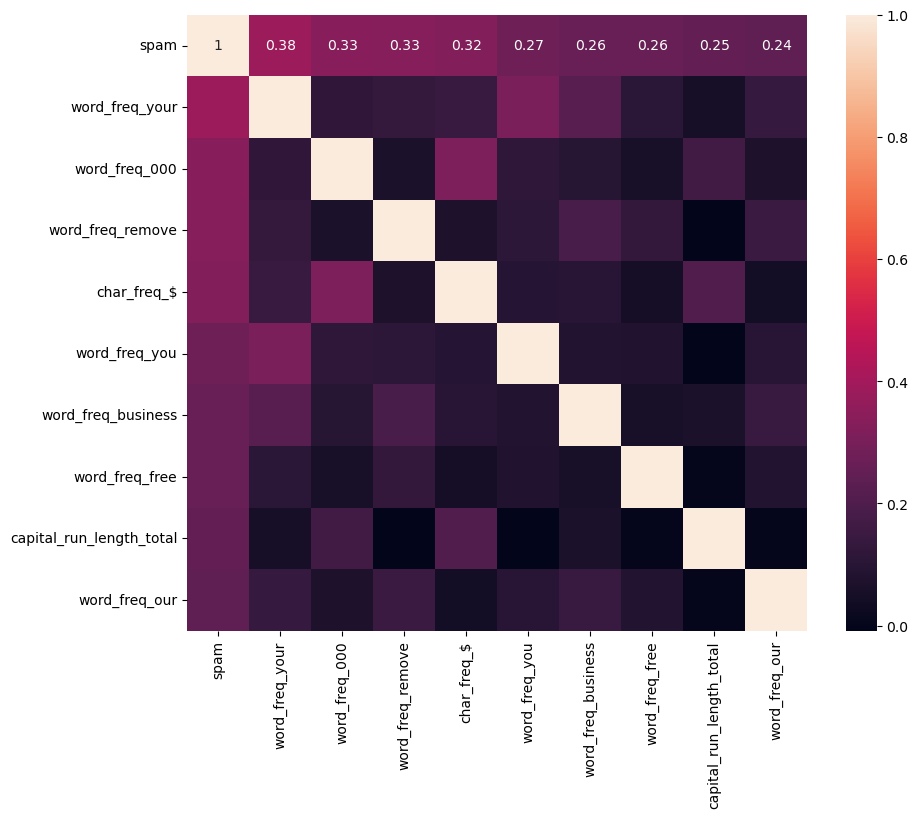

In [6]:
corr_matrix = df.corr()
top_n = 10

# Find the correlations with the target variable
correlations = corr_matrix['spam'].sort_values(ascending=False)

# Take the top-N features
top_features = correlations[:top_n].index

# Plot the heatmap for top-N features
plt.figure(figsize=(10,8))
sns.heatmap(df[top_features].corr(), annot=True)
plt.show()

In [7]:
#use of python scripts to preprocess data, train models on data and perform prediction
!python main.py --use_public_data

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

Confusion Matrix:
 [[505  26]
 [ 46 344]]

Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.97      0.93      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921

Confusion Matrix:
 [[520  11]
 [ 28 362]]

XGBoost Results:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.97      0.94      0.95       390

    accuracy               

In [8]:
#XGBoost and Random Forest models both achieved impressive accuracy and precision of 96% and 97% for spam mails respectively.